<h3>Tumor only model<h3/>
    
<h5>This file was built to test the class imablance in the dataset, this removes the no tumor class to create 3 more balanced classes </h5>

<h5>Importing libraries</h5>

In [1]:
#data handling
import pandas as pd
import numpy as np
import os 
from PIL import Image

# Machine learning (non deep learning)
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder 

# Deep learning
import tensorflow as tf
import keras
from keras import layers
from keras_preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

# plotting
import seaborn as sns
import matplotlib.pyplot as plt

# misc
import time # for recording model training time

<h5>Read in images into numpy arrays and record type of tumor with one hot encoder</h5>

In [2]:
img_reshape_size = (32,32) 

data = []
result = []

encoder = OneHotEncoder()
encoder.fit([[0], [1], [2]])  # 0 = meningioma tumor, 1 = glioma tumor , 2 = pitulitary tumor

# path to meningioma files
meningioma_image_dir = "dataset/split_data/multi-class/meningioma_tumor"
meningioma_files = os.listdir(meningioma_image_dir)

# path to glioma files
glioma_image_dir = "dataset/split_data/multi-class/glioma_tumor"
glioma_files = os.listdir(glioma_image_dir)

# path to pitulitary files
pitulitary_image_dir = "dataset/split_data/multi-class/pitulitary_tumor"
pitulitary_files = os.listdir(pitulitary_image_dir)


print("lengths of the tumors files")
print("length of meningioma tumor files " + str(len(meningioma_files)))
print("length of glioma tumor files " + str(len(glioma_files)))
print("length of pitulitary tumor files " + str(len(pitulitary_files)))
print("total files is " + str(len(meningioma_files)+len(glioma_files)+len(pitulitary_files)))
# should be 2546 files in total

# could be looped to reduce amount of code

## Meningioma tumor ## 
for file in meningioma_files:
    temp_file_path = meningioma_image_dir + "/" + file # create the path to the image
    img = Image.open(temp_file_path).convert('L') # read in the image
    img = img.resize(img_reshape_size) # resize the image (512x512 takes far too long to train and reduced accuracy)
    img = np.array(img) # put in np array
    data.append(np.array(img)) # add to another array of images 
    result.append(encoder.transform([[0]]).toarray()) # add a 0 to the one hot encoder to represent the meningioma tumor
       
## Glioma tumor ##
for file in glioma_files:
    temp_file_path = glioma_image_dir + "/"  +file
    img = Image.open(temp_file_path).convert('L')
    img = img.resize(img_reshape_size)
    img = np.array(img)
    data.append(np.array(img))
    result.append(encoder.transform([[1]]).toarray())
        
## Pitulitary tumor ##     
for file in pitulitary_files:
    temp_file_path = pitulitary_image_dir + "/"  +file
    img = Image.open(temp_file_path).convert('L')
    img = img.resize(img_reshape_size)
    img = np.array(img)
    data.append(np.array(img))
    result.append(encoder.transform([[2]]).toarray())

lengths of the tumors files
length of meningioma tumor files 855
length of glioma tumor files 860
length of pitulitary tumor files 831
total files is 2546


<h5>Reshape data and split between test and train data</h5>

In [3]:
data = np.array(data) # put in numpy array for ease of use
result = np.array(result) # put results in a numpy array for ease of use
result = result.reshape(2546,3) # reshape data
x_train,x_test,y_train,y_test = train_test_split(data, result, test_size=0.2, shuffle=True, random_state=0) # split into test train split

<h5>Build the CNN model</h5>

In [4]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10) # set the stopping criteria for the model

model = Sequential() # define the model type

model.add(Conv2D(32, kernel_size=(2, 2), input_shape=(32, 32, 1), padding = 'Same')) # set the input layer of the model
model.add(Conv2D(32, kernel_size=(2, 2),  activation ='relu', padding = 'Same'))

model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25)) 

model.add(Conv2D(64, kernel_size = (2,2), activation ='relu', padding = 'Same'))
model.add(Conv2D(64, kernel_size = (2,2), activation ='relu', padding = 'Same'))

model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax')) # set output layer

model.compile(loss = "categorical_crossentropy", optimizer='Adamax',  metrics = ['accuracy'])
#print(model.summary())

<h5>Train the model and record time to train</h5>

In [5]:
start_time = time.time() # record time to train for comparison 
history = model.fit(x_train, y_train, epochs = 300, batch_size = 16, verbose=1, validation_data = (x_test, y_test), callbacks=[callback])
print("--- %s seconds ---" % (time.time() - start_time))

Epoch 1/300
144/144 [==============================] - 4s 24ms/step - loss: 1.5672 - accuracy: 0.6137 - val_loss: 0.7931 - val_accuracy: 0.6706
Epoch 2/300
144/144 [==============================] - 3s 23ms/step - loss: 0.6927 - accuracy: 0.7163 - val_loss: 0.5066 - val_accuracy: 0.7922
Epoch 3/300
144/144 [==============================] - 3s 23ms/step - loss: 0.5857 - accuracy: 0.7573 - val_loss: 0.4266 - val_accuracy: 0.8157
Epoch 4/300
144/144 [==============================] - 3s 23ms/step - loss: 0.5244 - accuracy: 0.7791 - val_loss: 0.4040 - val_accuracy: 0.8275
Epoch 5/300
144/144 [==============================] - 3s 23ms/step - loss: 0.5067 - accuracy: 0.7717 - val_loss: 0.4149 - val_accuracy: 0.8275
Epoch 6/300
144/144 [==============================] - 3s 23ms/step - loss: 0.4408 - accuracy: 0.8075 - val_loss: 0.3884 - val_accuracy: 0.8471
Epoch 7/300
144/144 [==============================] - 3s 23ms/step - loss: 0.4047 - accuracy: 0.8267 - val_loss: 0.3611 - val_accuracy:

<h6>Some basic results recording, just for keeping information to hand</h6>

94.34445095062256 seconds --- 30 epochs , 0.9033 acc , 32x32 RGB image (images are still in greyscale, just RGB format)

343.3586163520813 seconds --- 30 epcohs , 0.9182 acc , 64x64 RGB image (images are still in greyscale, just RGB format)

1364.8851137161255 seconds --- 30 epochs , 0.8950 acc , 128x128 Greyscale image

313.81851744651794 seconds --- 30 epochs , 0.8750 acc , 64x64 Greyscale image

87.09897923469543 seconds --- 30 epochs , 0.8833 acc , 32x32 Greyscale image

31.2696533203125 seconds --- 30 epochs , 0.8200 acc , 16x16 Greyscale image

183.15469479560852 seconds --- 60 epochs , 0.9117 acc , 32x32 Greyscale image

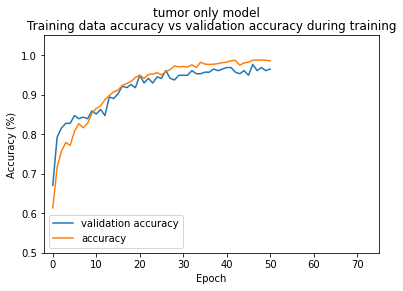

In [11]:
plt.plot(history.history['val_accuracy'], label="validation accuracy")
plt.plot(history.history['accuracy'], label="accuracy")
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.suptitle('tumor only model')
plt.title('Training data accuracy vs validation accuracy during training')
ax = plt.gca()
ax.set_xlim([-2, 75])
ax.set_ylim([0.5, 1.05])
plt.legend()
plt.show()

<h5>Read in the validation data in the same way we read in the training and testing data but wihtout the no tumor class</h5>

In [7]:
#img_reshape_size = (32,32) alreadly set higher up

validation_data = []
validation_result = []

encoder = OneHotEncoder()
encoder.fit([[0], [1], [2]]) 

# path to meningioma files
meningioma_image_dir = "test_dataset/test/split_data/multi-class/meningioma_tumor"
meningioma_files = os.listdir(meningioma_image_dir)

# path to glioma files
glioma_image_dir = "test_dataset/test/split_data/multi-class/glioma_tumor"
glioma_files = os.listdir(glioma_image_dir)

# path to pitulitary files
pitulitary_image_dir = "test_dataset/test/split_data/multi-class/pitulitary_tumor"
pitulitary_files = os.listdir(pitulitary_image_dir)


for file in meningioma_files:
    temp_file_path = meningioma_image_dir + "/" + file
    img = Image.open(temp_file_path).convert('L')
    img = img.resize(img_reshape_size)
    img = np.array(img)
    validation_data.append(np.array(img))
    validation_result.append(encoder.transform([[0]]).toarray())
        
for file in glioma_files:
    temp_file_path = glioma_image_dir + "/"  +file
    img = Image.open(temp_file_path).convert('L')
    img = img.resize(img_reshape_size)
    img = np.array(img)
    validation_data.append(np.array(img))
    validation_result.append(encoder.transform([[1]]).toarray())
        
        
for file in pitulitary_files:
    temp_file_path = pitulitary_image_dir + "/"  +file
    img = Image.open(temp_file_path).convert('L')
    img = img.resize(img_reshape_size)
    img = np.array(img)
    validation_data.append(np.array(img))
    validation_result.append(encoder.transform([[2]]).toarray())
    

print("length of validation data: " + str(len(meningioma_files)+len(glioma_files)+len(pitulitary_files)))

length of validation data: 163


<h5>reshape validation data</h5>

In [8]:
validation_data = np.array(validation_data)
validation_result = np.array(validation_result)
validation_result = validation_result.reshape(163,3)

<h5>Get and print scores</h5>

In [9]:
scores = model.evaluate(validation_data, validation_result, verbose=10)

In [10]:
print("test loss: " + str(scores[0]))
print("test accuracy: " + str(scores[1]))

test loss: 0.1848827600479126
test accuracy: 0.9509202241897583
